In [1]:
include("../../src/WaterLily.jl")
WaterLily = Main.WaterLily;
using Plots; gr()
using StaticArrays
using JLD
using Statistics

In [2]:
inside(a::AbstractArray) = CartesianIndices(map(ax->first(ax)+1:last(ax)-1,axes(a)))
@inline CI(a...) = CartesianIndex(a...)
"""
    δ(i,N::Int)
    δ(i,I::CartesianIndex{N}) where {N}

Return a CartesianIndex of dimension `N` which is one at index `i` and zero elsewhere.
"""
δ(i,::Val{N}) where N = CI(ntuple(j -> j==i ? 1 : 0, N))
δ(i,I::CartesianIndex{N}) where N = δ(i, Val{N}())

δ (generic function with 2 methods)

In [3]:
N = 4

4

In [4]:
nhat = zeros(N+2,N+2,2);
alpha = zeros(N+2,N+2);

In [5]:
u = nhat*0.0
baseList = ((-1:N).-N/2)/N
xList = reshape(baseList,(N+2,1))
yList = reshape(baseList,(1,N+2))
u[:,:,1] .= xList
u[:,:,2] .= -yList;
PlotList = baseList[2:end-1].+0.5/N;

In [6]:
function circleSDF(xx)
    x,y = @. (xx-1.5) - N/2
    return (x^2+y^2)^0.5 - N/8*1.4
end

circleSDF (generic function with 1 method)

In [7]:
inter = WaterLily.cVOF((N,N), nhat, alpha; InterfaceSDF=circleSDF)

Main.WaterLily.cVOF{2, Float64, Matrix{Float64}, Array{Float64, 3}}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.006805555555555553 0.006805555555555553 … 0.007182021768284656 0.007182021768284656; 0.006805555555555553 0.006805555555555553 … 0.007182021768284656 0.007182021768284656; … ; 0.007182021768284656 0.007182021768284656 … 0.006805555555555553 0.006805555555555553; 0.007182021768284656 0.007182021768284656 … 0.006805555555555553 0.006805555555555553], [-0.0 -0.0 … -0.0 -0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.7071067811865476 0.7071067811865476; -0.0 -0.0 … -0.7071067811865476 -0.7071067811865476;;; -0.0 0.0 … 0.0 -0.0; -0.0 0.0 … 0.0 -0.0; … ; -0.0 0.0 … 0.7071067811865476 -0.7071067811865476; -0.0 0.0 … 0.7071067811865476 -0.7071067811865476], [0.006805555555555553 0.006805555555555553 … 0.007182021768284656 0.007182021768284656; 0.006805555555555553 0.006

In [23]:
function plotInterface(f,x=PlotList,y=PlotList,xlimit=[-0.5,0.5],ylimit=[-0.5,0.5])
    Plots.heatmap(x,y,f[2:end-1,2:end-1]', aspect_ratio=:equal,color=:bwr,levels=33,xlimit=xlimit,ylimit=ylimit,clim=(0,1))
    plt = Plots.contour!(x,y,f[2:end-1,2:end-1]', aspect_ratio=:equal,color=:black,levels=[0.5],xlimit=xlimit,ylimit=ylimit,linewidth=2)
    return plt
end

plotInterface (generic function with 5 methods)

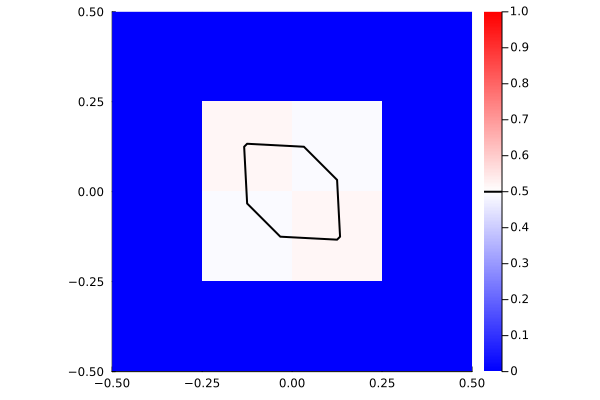

In [9]:
plotInterface(inter.f)

┌ Info: Saved animation to /tmp/jl_WjqJyvG3Od.gif
└ @ Plots /home/tyhuang/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_WjqJyvG3Od.gif")
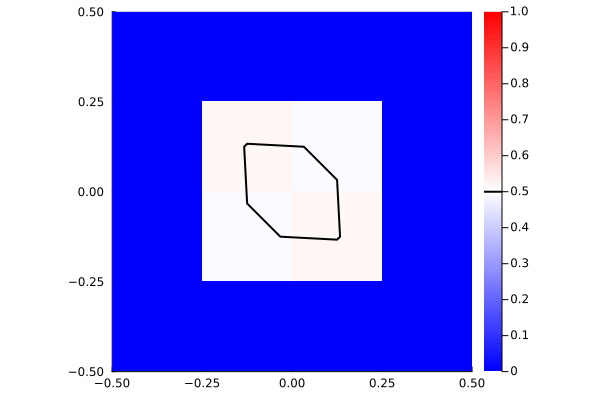

In [10]:
dt = 0.5
a = Animation()
c = []
for i ∈ 1:100
    push!(c,sum(inter.f[2:end-1,2:end-1]))
    WaterLily.freeint_update!(dt, inter.f, inter.fᶠ, inter.n̂, inter.α, u, u, inter.c̄;perdir=inter.perdir,dirdir=inter.dirdir)
    plt = plotInterface(inter.f)
    if i%1==0
        frame(a,plt)
    end
end
gif(a)

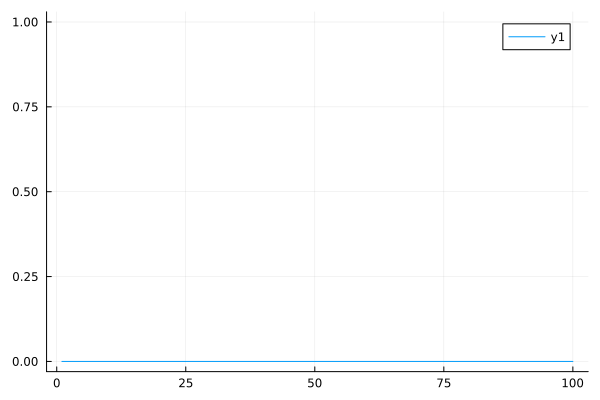

In [11]:
Plots.plot(((c.-c[1])/c[1])/eps(eltype(inter.f)))

In [25]:
sim = WaterLily.TwoPhaseSimulation((8,8), (0,0), 1;U=1, Δt=0.01,grav=(0,0), ν=0, T=Float64,λν=1,λρ=1e-3,perdir=(1,2),uλ=(i,x) -> ifelse(i==1,1,0))
sim.inter.f .= 0.0
sim.inter.f[5,:] .= 0.1
sim.inter.f⁰ .= sim.inter.f;

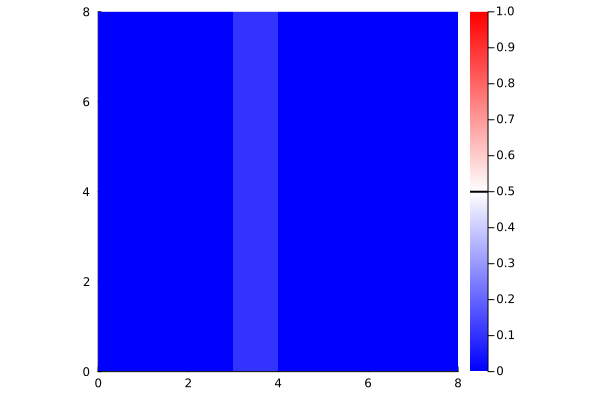

In [108]:
plotInterface(sim.inter.f,0.5:7.5,0.5:7.5,[0,8],[0,8])

In [107]:
WaterLily.mom_step!(sim.flow, sim.pois, sim.inter, sim.body)
sim.flow.u

10×10×2 Array{Float64, 3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [103]:
WaterLily.advect!(sim.flow,sim.inter,sim.inter.f,sim.flow.u⁰,sim.flow.u);

In [104]:
sim.inter.n̂

10×10×2 Array{Float64, 3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2] =
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.